<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Visualization_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=94bb0c422776f82538b0ee3ef6d245d24e1ed552dc99f84848bc6df45cd582c8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
# load_extended_boston
X, y = mglearn.datasets.load_extended_boston()
X.shape, y.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

((506, 104), (506,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn import metrics

In [ ]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(kernel='linear')]

In [ ]:
for m in models:
  m.fit(X_train,y_train)

In [ ]:
labels = ['Regresión linear', 'Regresión Ridge alpha=1', 'Regresión Lasso alpha=1','Regresión ElasticNet alpha=1,rho=0.5','SVR C=1.0']
for i,m in enumerate(models):
  print('Model', labels[i])
  print("Score train:", m.score(X_train, y_train))
  print("Score test:",m.score(X_test, y_test))
  y_pred = m.predict(X_test)
  print("MAE",metrics.mean_absolute_error(y_test,y_pred)/y_test.mean())
  print("RMSE:", metrics.mean_squared_error(y_test,y_pred)/y_test.mean())
  print()

Model Regresión linear
Score train: 0.9520519609032727
Score test: 0.6074721959665571
MAE 0.1446181269816706
RMSE: 1.4376717005334618

Model Regresión Ridge alpha=1
Score train: 0.8857966585170941
Score test: 0.7527683481744751
MAE 0.13281865234138446
RMSE: 0.9055102483273164

Model Regresión Lasso alpha=1
Score train: 0.29323768991114607
Score test: 0.20937503255272294
MAE 0.2460694432297761
RMSE: 2.8957417277307007

Model Regresión ElasticNet alpha=1,rho=0.5
Score train: 0.32837814485847916
Score test: 0.2217004367773664
MAE 0.24537727527462072
RMSE: 2.850598722141482

Model SVR C=1.0
Score train: 0.7967245647119241
Score test: 0.6223564832985943
MAE 0.15198116335589193
RMSE: 1.383156533811526



In [ ]:
#Ridge
model_select = [Ridge(alpha=0.1),Ridge(alpha=5)]
for i,m in enumerate(model_select):
  print('Ridge',i+1)
  m.fit(X_train,y_train)
  print("Score train:", m.score(X_train, y_train))
  print("Score test:",m.score(X_test, y_test))
  y_pred = m.predict(X_test)
  print("MAE",metrics.mean_absolute_error(y_test,y_pred)/y_test.mean())
  print("RMSE:", metrics.mean_squared_error(y_test,y_pred)/y_test.mean())
  print()

Ridge 1
Score train: 0.928227368500199
Score test: 0.7722067936479818
MAE 0.13051808889945962
RMSE: 0.8343150293582103

Ridge 2
Score train: 0.8223977022483581
Score test: 0.6812572657432487
MAE 0.1507960808444766
RMSE: 1.1674266232425836



In [ ]:
## vemos que se va bajando y que hay un sobre entrenamiento; 
##está forzando a tener un menor residuo pero no da un 
##comportamiento altamente lineal

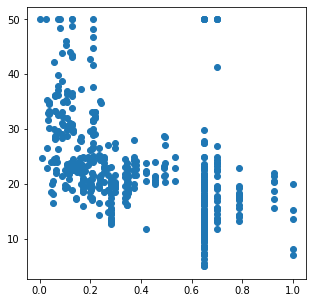

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,2],y)

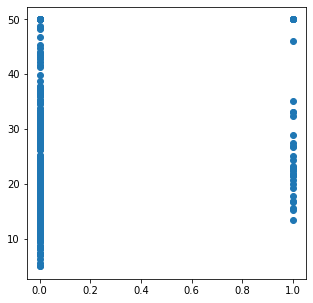

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,3],y)

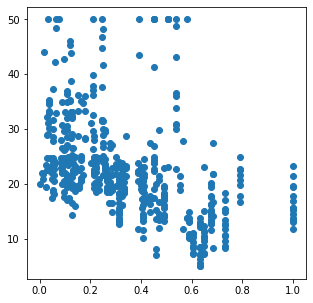

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,4],y)

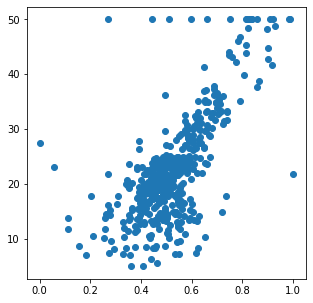

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,5],y)

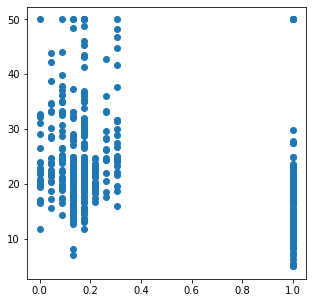

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,8],y)

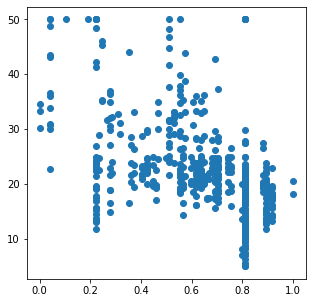

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,10],y)

In [ ]:
## al ttratar de buscar un menor residuo termina haciendo un sobreentrenamiento 

GRIDSHARE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.svm import SVR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [ ]:
grid=[{'alpha':[0.1,1,10,100,1000],'l1_ratio':[0.1,0.3,0.6,0.9,0.99,0.999]}]
gsearch=GridSearchCV(ElasticNet(),grid,scoring='r2',cv=5)
gsearch.fit(X,y)
gsearch.best_params_

{'alpha': 0.1, 'l1_ratio': 0.999}

In [ ]:
gsearch.best_score_

0.4485448960581365

In [ ]:
y_pred=gsearch.predict(X_test)

Ridge

In [ ]:
np.expand_dims(X, axis=0)

array([[[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
         1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
         1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
        [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
         9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
        ...,
        [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
        [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
         9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
        [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.69701987e-01, 2.87987643e-02]]])

In [ ]:
grid=[{'alpha':[0.01,0.1,1,10,100,1000]}]
gsearch=GridSearchCV(Ridge(),grid,scoring='r2',cv=5)
gsearch.fit(X_train,y_train)
print("Los mejores params:",gsearch.best_params_)
print("Score train (best model):",gsearch.best_score_)
print("Score test (best model):",gsearch.score(X_test,y_test))

Los mejores params: {'alpha': 0.1}
Score train (best model): 0.8401627904098886
Score test (best model): 0.8747828820979182


In [ ]:
grid=[{'kernel':['linear'],'C':[0.01,0.1,1,10,100,1000]},]
gsearch=GridSearchCV(SVR(),grid,scoring='r2',cv=5)
gsearch.fit(X_train,y_train)
print("Los mejores params:",gsearch.best_params_)
print("Score train (best model):",gsearch.best_score_)
print("Score test (best model):",gsearch.score(X_test,y_test))

Los mejores params: {'C': 1000, 'kernel': 'linear'}
Score train (best model): 0.8091961777951392
Score test (best model): 0.8501499566418637


In [ ]:
grid=[{'kernel':['linear'],'C':[0.01,0.1,1,10,100,1000]},{'kernel':['rbf'],'C':[0.01,0.1,1,10,100,1000]}]
gsearch=GridSearchCV(SVR(),grid,scoring='r2',cv=5)
gsearch.fit(X_train,y_train)
print("Los mejores params:",gsearch.best_params_)
print("Score train (best model):",gsearch.best_score_)
print("Score test (best model):",gsearch.score(X_test,y_test))

Los mejores params: {'C': 100, 'kernel': 'rbf'}
Score train (best model): 0.8639273205182366
Score test (best model): 0.870693474133418
